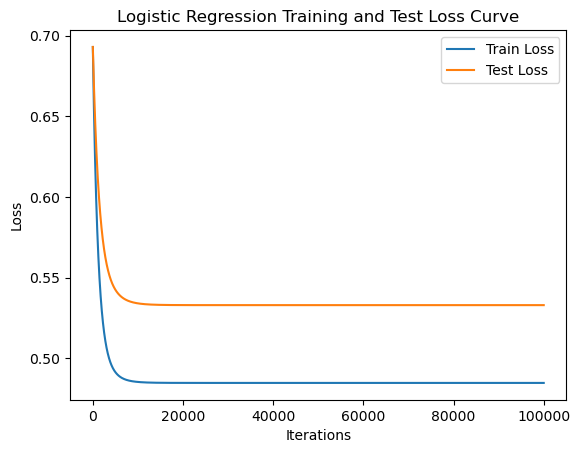

训练集：Accuracy=0.94, Precision=0.91, Recall=1.00, F1 Score=0.95
测试集：Accuracy=0.87, Precision=0.86, Recall=0.95, F1 Score=0.90


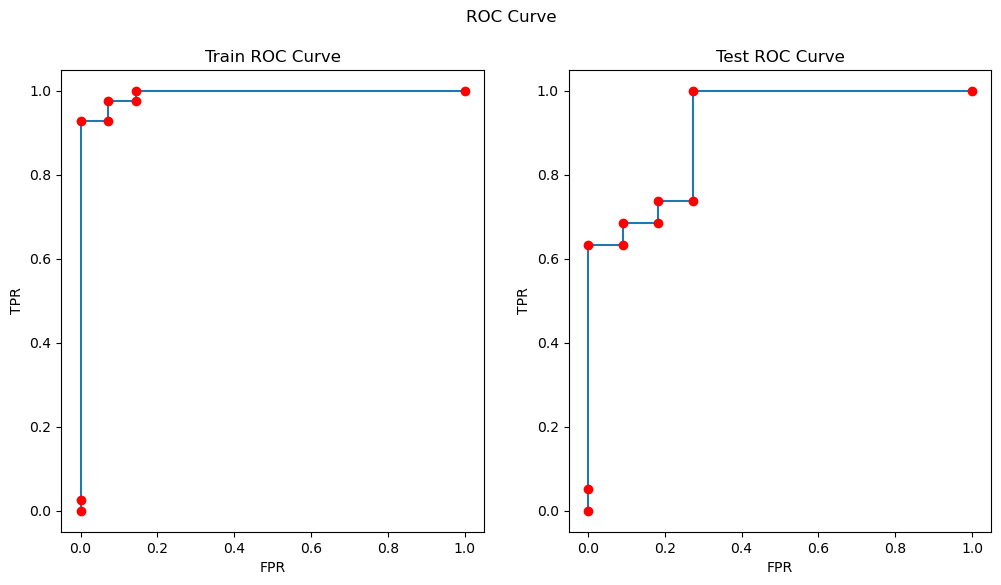

训练集AUC值: 0.99
测试集AUC值: 0.91


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# 读取数据
path = r'C:\Users\2200170213\Desktop\ex2data1.txt'
data = pd.read_csv(path)
col = data.shape[1]
X_data = data.iloc[:, :col-1]
y_data = data.iloc[:, col-1:]
X_data.insert(0, "ones", 1)
X = X_data.values
Y = y_data.values

# 数据分割
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

# 特征缩放
x_mean = np.mean(x_train[:, 1:], axis=0)
x_std = np.std(x_train[:, 1:], axis=0)
x_train[:, 1:] = (x_train[:, 1:] - x_mean) / x_std
x_test[:, 1:] = (x_test[:, 1:] - x_mean) / x_std

# Logistic回归函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def computeCost(X, Y, W, lambda_reg):
    num_train = X.shape[0]
    Y_hat = sigmoid(X @ W)
    loss = np.sum(-Y * np.log(Y_hat) - (1 - Y) * np.log(1 - Y_hat)) / num_train
    reg_loss = lambda_reg * (np.sum(W[1:] ** 2) / 2)  # 正则化项，不包括偏置项
    return loss + reg_loss

def gradientDescent(X, Y, W, alpha, lambda_reg):
    num_train = X.shape[0]
    Y_hat = sigmoid(X @ W)
    dw = X.T @ (Y_hat - Y) / num_train
    reg_dw = lambda_reg * W
    reg_dw[0] = 0  # 不对偏置项进行正则化
    W -= alpha * (dw + reg_dw)
    return W

def logisticRegression(X, Y, alpha, iterations, lambda_reg):
    loss_history = []
    feature_dim = X.shape[1]
    W = np.zeros((feature_dim, 1))
    for i in range(iterations):
        W = gradientDescent(X, Y, W, alpha, lambda_reg)
        loss = computeCost(X, Y, W, lambda_reg)
        loss_history.append(loss)
    return W, loss_history

# 模型训练
alpha = 0.001
iterations = 100000
lambda_reg = 0.2
W, loss_history_train = logisticRegression(x_train, y_train, alpha, iterations, lambda_reg)
_, loss_history_test = logisticRegression(x_test, y_test, alpha, iterations, lambda_reg)

# 绘制损失曲线
plt.plot(np.arange(iterations), loss_history_train, label='Train Loss')
plt.plot(np.arange(iterations), loss_history_test, label='Test Loss')  
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Logistic Regression Training and Test Loss Curve')
plt.legend()
plt.show()

# 模型测试与评估
def predict(X, W):
    pred_prob = sigmoid(X @ W)
    pred_labels = (pred_prob >= 0.5).astype(int)
    return pred_labels, pred_prob
_, prob_train = predict(x_train, W)
y_pred_train, _ = predict(x_train, W)
y_pred_test, prob_test = predict(x_test, W)

# 计算准确率、召回率、F1分数等指标
def evaluate(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    return accuracy, precision, recall, f1_score

accuracy_train, precision_train, recall_train, f1_score_train = evaluate(y_train, y_pred_train)
accuracy_test, precision_test, recall_test, f1_score_test = evaluate(y_test, y_pred_test)

print("训练集：Accuracy={:.2f}, Precision={:.2f}, Recall={:.2f}, F1 Score={:.2f}".format(accuracy_train, precision_train, recall_train, f1_score_train))
print("测试集：Accuracy={:.2f}, Precision={:.2f}, Recall={:.2f}, F1 Score={:.2f}".format(accuracy_test, precision_test, recall_test, f1_score_test))

# 计算训练集的ROC曲线
fpr_train, tpr_train, _ = roc_curve(y_train, prob_train)  
roc_auc_train = auc(fpr_train, tpr_train)

# 计算测试集的ROC曲线
fpr_test, tpr_test, _ = roc_curve(y_test, prob_test) 
roc_auc_test = auc(fpr_test, tpr_test)

# 绘制ROC曲线
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.suptitle('ROC Curve')
plt.plot(fpr_train,tpr_train)
plt.plot(fpr_train,tpr_train,'ro')
plt.title("Train ROC Curve")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.subplot(1,2,2)
plt.suptitle('ROC Curve')
plt.plot(fpr_test,tpr_test)
plt.plot(fpr_test,tpr_test,'ro')  
plt.title("Test ROC Curve")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
print("训练集AUC值: {:.2f}".format(roc_auc_train))
print("测试集AUC值: {:.2f}".format(roc_auc_test))